# at first, handling the data

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

upload your kaggle.json file

In [ ]:
!kaggle datasets download -d alxmamaev/flowers-recognition

 98% 220M/225M [00:03<00:00, 101MB/s] 
100% 225M/225M [00:03<00:00, 76.6MB/s]


In [ ]:
!unzip \*.zip && rm *.zip


usint pathlib liberary we can handel images' path more easly

In [ ]:
import pathlib
data_dir = 'flowers'
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('flowers')

(* / * ) this is go recursivly to every dir and get all the jpg images

In [ ]:
list(data_dir.glob('*/*.jpg'))[:3]

[PosixPath('flowers/tulip/8710148289_6fc196a0f8_n.jpg'),
 PosixPath('flowers/tulip/5717949231_23e2d4c297_n.jpg'),
 PosixPath('flowers/tulip/21083449726_2895661dfb_n.jpg')]

In [ ]:
all_imgs_number = len(list(data_dir.glob('*/*.jpg')))
all_imgs_number

4317

so, we have 4317 images in flowers dir

In [ ]:
daisy_s = list(data_dir.glob('daisy/*'))
daisy_s[:2]

[PosixPath('flowers/daisy/14163875973_467224aaf5_m.jpg'),
 PosixPath('flowers/daisy/14399435971_ea5868c792.jpg')]

In [ ]:
dandelion_s = list(data_dir.glob('dandelion/*'))
dandelion_s[:2]

[PosixPath('flowers/dandelion/5727534342_419604c177_n.jpg'),
 PosixPath('flowers/dandelion/8719032054_9a3ce4f0ff.jpg')]

In [ ]:
rose_s = list(data_dir.glob('rose/*'))
rose_s[:2]

[PosixPath('flowers/rose/10090824183_d02c613f10_m.jpg'),
 PosixPath('flowers/rose/3556123230_936bf084a5_n.jpg')]

In [ ]:
sunflower_s = list(data_dir.glob('sunflower/*'))
sunflower_s[:2]


[PosixPath('flowers/sunflower/8234846550_fdaf326dbe.jpg'),
 PosixPath('flowers/sunflower/14741812319_e1d32ffb84_n.jpg')]

In [ ]:
tulip_s = list(data_dir.glob('tulip/*'))
tulip_s[:2]

[PosixPath('flowers/tulip/8710148289_6fc196a0f8_n.jpg'),
 PosixPath('flowers/tulip/5717949231_23e2d4c297_n.jpg')]

the next command for solving an issue with PIL liberary

In [ ]:
!pip3 install --upgrade Pillow

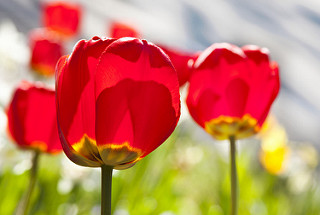

In [ ]:
from PIL import Image
Image.open(str(tulip_s[0]))

In [ ]:
img_dic = {
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'rose':list(data_dir.glob('rose/*')),
    'sunflower':list(data_dir.glob('sunflower/*')),
    'tulip':list(data_dir.glob('tulip/*'))
}

In [ ]:
label_dic ={
    'daisy':0,
    'dandelion':1,
    'rose':2,
    'sunflower':3,
    'tulip':4
}

In [ ]:
str(img_dic['tulip'][0])

'flowers/tulip/8710148289_6fc196a0f8_n.jpg'

In [ ]:
import cv2
imgg = cv2.imread(str(img_dic['tulip'][0]))
imgg.shape

(215, 320, 3)

In [ ]:
reuse = cv2.resize(imgg,(224,224))
reuse.shape

(224, 224, 3)

In [ ]:
train = []
test = []
for name, images in img_dic.items():
    for image in images:
        read = cv2.imread(str(image))
        resized_img = cv2.resize(read,(224,224))
        train.append(resized_img)
        test.append(label_dic[name])

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras 
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential



In [ ]:
train = np.array(train)
test = np.array(test)


use the pretrained model api 

In [ ]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, test, random_state=0)

scale only x becouse y is just a simple array




In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255


predicting an image without any feature extraction or retrain the pretrained model

In [ ]:
!wget https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt

--2021-11-24 15:20:54--  https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.111.128, 108.177.121.128, 108.177.120.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10484 (10K) [text/plain]
Saving to: ‘ImageNetLabels.txt’

ImageNetLabels.txt  100%[===================>]  10.24K  --.-KB/s    in 0s      

2021-11-24 15:20:54 (76.9 MB/s) - ‘ImageNetLabels.txt’ saved [10484/10484]



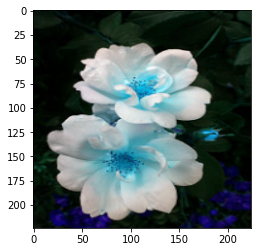

In [ ]:
u = cv2.imread(str(img_dic['rose'][0]))
x0_resized = cv2.resize(u, IMAGE_SHAPE)
plt.imshow(x0_resized)

In [ ]:
predicted = classifier.predict(np.array([x0_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

array([795])

In [ ]:
image_labels = []
with open("ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[722] #the index of the above classification

'pillow'

see, the model miscalssified the image to be a pillow,so 
let's manipulate it to calssifier only flowers

In [ ]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_last_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

this feature api and the main model api can be obtained from : https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4

In [ ]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_last_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


we have manipulated only the last layer (to edit class number) while the rest are still the same (perserved weights)

In [ ]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
102/102 [==============================] - 14s 87ms/step - loss: 0.8263 - acc: 0.6886
Epoch 2/5
102/102 [==============================] - 9s 83ms/step - loss: 0.4350 - acc: 0.8582
Epoch 3/5
102/102 [==============================] - 9s 85ms/step - loss: 0.3520 - acc: 0.8814
Epoch 4/5
102/102 [==============================] - 9s 85ms/step - loss: 0.2988 - acc: 0.9018
Epoch 5/5
102/102 [==============================] - 9s 84ms/step - loss: 0.2591 - acc: 0.9212


In [ ]:
model.evaluate(X_test_scaled,y_test) 

34/34 [==============================] - 4s 94ms/step - loss: 0.3572 - acc: 0.8787


[0.35719960927963257, 0.8787037134170532]

AxesImage(54,36;334.8x217.44)


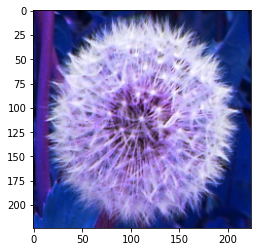

In [ ]:
print(plt.imshow(X_test[2]))


AxesImage(54,36;334.8x217.44)


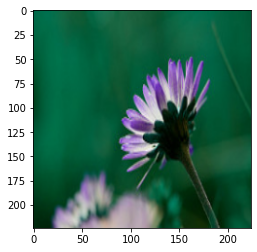

In [ ]:
print(plt.imshow(X_test[3]))

In [ ]:


p = model.predict(X_test_scaled[2:4])
p

array([[-5.396739 ,  3.071544 , -4.7469144,  0.5841108, -3.2169077],
       [ 1.6168493,  0.8058695, -3.7662559, -1.1175914, -2.519261 ]],
      dtype=float32)

In [ ]:
acc =np.argmax(p,axis=1)
acc

array([1, 0])

0 is the index of tulips flowers according to the dic created

In [ ]:
list(acc)

[1, 0]

In [ ]:
def show_the_class(no):
  
  no=list(no)
  for i in range(len(no)):
      for key,value in label_dic.items():
        if no[i] == value:
          print(key)
        
      
      
    
    
    

    
show_the_class(acc)      

dandelion
daisy


thanks to codebasics, their tutorial was helpful : https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/master/18_transfer_learning/cnn_transfer_learning.ipynb 